In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
path = '/Users/aymericvie/Documents/GitHub/evology/evology/data/replication/empirical_funds/flow_data.csv'
df = pd.read_csv(path)


In [66]:
print(df.columns)

Index(['Unnamed: 0', 'cik', 'series_id', 'form', 'report_date', 'as_of_date',
       'total_assets', 'total_liabilities', 'net_assets',
       'month_1_flow_redemption', 'month_1_flow_reinvestment',
       'month_1_flow_sales', 'month_2_flow_redemption',
       'month_2_flow_reinvestment', 'month_2_flow_sales',
       'month_3_flow_redemption', 'month_3_flow_reinvestment',
       'month_3_flow_sales'],
      dtype='object')


In [67]:
sum_net_assets = df['net_assets'].sum()
sum_changes_month1 = df['month_1_flow_redemption'].sum() + df['month_1_flow_sales'].sum() + df['month_1_flow_reinvestment'].sum()

variation_month_1 = 100 * abs(sum_changes_month1 / sum_net_assets)
print(variation_month_1)

sum_changes_month2 = df['month_2_flow_redemption'].sum() + df['month_2_flow_sales'].sum() + df['month_2_flow_reinvestment'].sum()

variation_month_2 = 100 * abs(sum_changes_month2 / sum_net_assets)
print(variation_month_2)

sum_changes_month3 = df['month_3_flow_redemption'].sum() + df['month_3_flow_sales'].sum() + df['month_3_flow_reinvestment'].sum()

variation_month_3 = 100 * abs(sum_changes_month3 / sum_net_assets)
print(variation_month_3)

print('Average ' + str(variation_month_1 / 3 + variation_month_2 / 3 + variation_month_3 / 3))

sum_redemptions = abs(df['month_3_flow_redemption']).sum() + abs(df['month_2_flow_redemption']).sum() + abs(df['month_1_flow_redemption']).sum()
percentage_redemptions = 100 * sum_redemptions / sum_net_assets
print(percentage_redemptions)

4.466510031767579
4.4869492062410625
5.072889576359245
Average 4.6754496047892955
8.276962830849376


inf
8.555388946193244


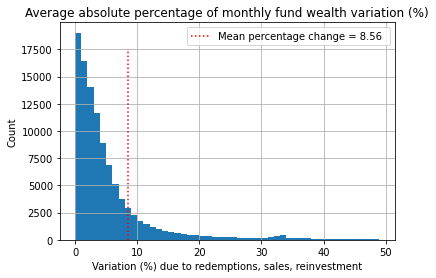

In [68]:
''' Distribution '''
import numpy as np

df['Flow1'] = abs((df['month_1_flow_redemption'] + df['month_1_flow_sales'] + df['month_1_flow_reinvestment']) / df['net_assets'])
df['Flow2'] = abs((df['month_2_flow_redemption'] + df['month_2_flow_sales'] + df['month_2_flow_reinvestment']) / df['net_assets'])
df['Flow3'] = abs((df['month_3_flow_redemption'] + df['month_3_flow_sales'] + df['month_3_flow_reinvestment']) / df['net_assets'])

df['FlowAvg'] = 100 * (df['Flow1'] / 3 + df['Flow2'] / 3 + df['Flow3'] / 3)
# df.replace([np.inf, -np.inf], np.nan,inplace=True)
print(df['FlowAvg'].mean())
# df['FlowAvg'] = df['FlowAvg'].apply(lambda x: [y if y <= 100 else 100 for y in x])
df['FlowAvg'].values[df['FlowAvg'] > 1000] = 1000
print(df['FlowAvg'].mean())

df.hist(column='FlowAvg', bins = range(0,50))
plt.title('Average absolute percentage of monthly fund wealth variation (%)')
plt.xlabel('Variation (%) due to redemptions, sales, reinvestment')
plt.ylabel('Count')
num = round(df['FlowAvg'].mean(),2)
plt.vlines(num, colors='r', ymin = 0, ymax = 17500, linestyles='dotted', label= 'Mean percentage change = %.2f ' % num)
plt.legend()
plt.show()


In [69]:
# WEALTH FLOWS (percent variation in NAV averaged across entities)



# what we can't do: pct_change over nav column.
# Because it would consider variations between funds that are not the same.
# Because also we have negative and 0.0 values. 
wrong_pct = df['net_assets'].pct_change().mean()
print(wrong_pct)

# Example for the first fund series_id:
df2 = df[df['series_id'] == 'S000000008']
tiny_pct = df2['net_assets'].pct_change().mean()
print(tiny_pct)
df2 = df[df['series_id'] == 'S000000040']
tiny_pct = df2['net_assets'].pct_change().mean()
print(tiny_pct)

# So, what we want is the average pct_change, iterating over different values of series_id.
# That would mean, construct a list (of pct changes) and get its mean.
# We iterate over all the rows of the dataset. If this new row has the same series id, append the pct change. Otherwise, don't.

pct_changes = []
print(len(df))

for i in range(len(df)):
    if i >= 1:
        if df['series_id'].iloc[i] == df['series_id'].iloc[i-1]:
            value =  abs((df['net_assets'].iloc[i] / df['net_assets'].iloc[i-1]) - 1)
            pct_changes.append(value)
        else:
            pass



inf
0.03024934419544174
0.04284103656910898
106693


59.69101206843053
0.12137535907230126
9.000000034725177


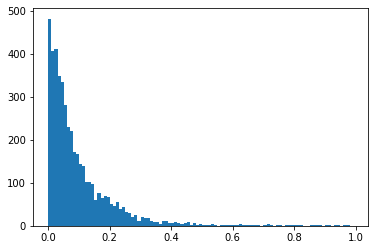

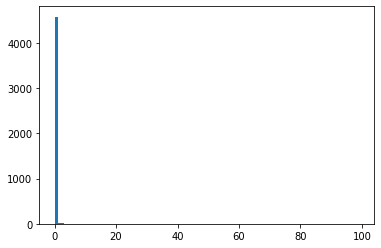

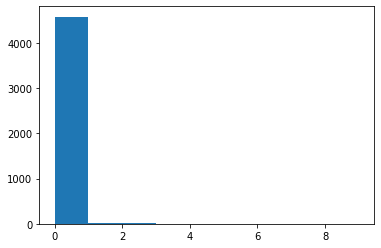

In [70]:
print(np.mean(pct_changes))
for i in range(len(pct_changes)):
    if pct_changes[i] > 10:
        pct_changes[i] = np.nan
print(np.nanmean(pct_changes))
print(max(pct_changes))
bins = range(0,100)
bins = [item / 100 for item in bins]
plt.hist(pct_changes, bins = bins)
plt.show()
plt.hist(pct_changes, bins = range(0,100))
plt.show()
plt.hist(pct_changes, bins = range(0,10))
plt.show()


In [71]:
print(np.nanmean(df['net_assets']))

2292630470.872589


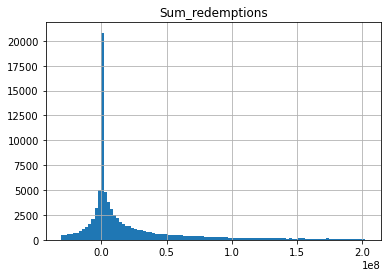

7.213856227190142


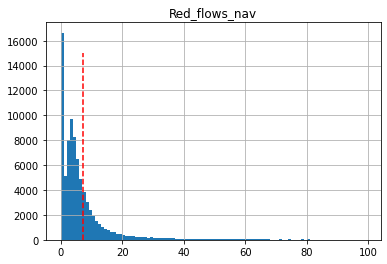

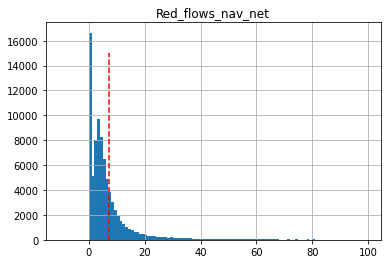

In [72]:
# Investment flows

df["Sum_redemptions"] = df['month_1_flow_redemption'] + df['month_2_flow_redemption'] + df['month_3_flow_redemption']
df2 = pd.DataFrame()
df2["Sum_redemptions"] = df['Sum_redemptions']
df2["net_assets"] = df['net_assets']

# Sum redemptions histogram (excluding outliers)
df2 = df2[(df2["Sum_redemptions"] < df["Sum_redemptions"].quantile(q=0.9)) & (df2["Sum_redemptions"] > df["Sum_redemptions"].quantile(q=0.1))]
df2.hist(column='Sum_redemptions', bins = 100)
plt.show()

# Ratio of redemptions to net asset values
df2 = df2[df2["net_assets"] > 0]

df2["Red_flows_nav"] = 100 * abs(df2["Sum_redemptions"]) / df2["net_assets"]
df2["Red_flows_nav_net"] = 100 * abs(df2["Sum_redemptions"]) / df2["net_assets"]
df2 = df2[df2["Red_flows_nav"] <= 100]
df2 = df2[df2["Red_flows_nav"] >= 0]
print(np.nanmean(df2["Red_flows_nav"]))

df2.hist(column='Red_flows_nav', bins = range(0,100))
plt.vlines(x=np.nanmean(df2["Red_flows_nav"]), ymin=0, ymax=15000, colors='red', linestyles='dashed')
plt.show()

df2.hist(column='Red_flows_nav_net', bins = range(-10,100))
plt.vlines(x=np.nanmean(df2["Red_flows_nav_net"]), ymin=0, ymax=15000, colors='red', linestyles='dashed')
plt.show()


Average quarterly ratio between redemptions and nav
2.541304836385038


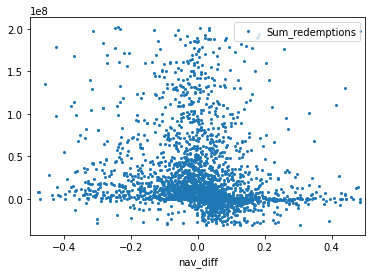

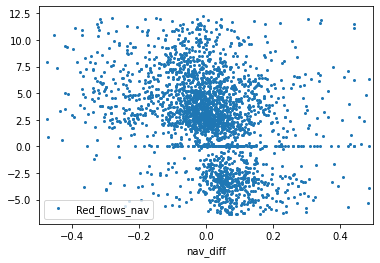

In [84]:
df = pd.read_csv(path)
df["Sum_redemptions"] = df['month_1_flow_redemption'] + df['month_2_flow_redemption'] + df['month_3_flow_redemption']
df["Red_flows_nav"] = 100 * (df["Sum_redemptions"]) / df["net_assets"]
arr = [np.nan]
for i in range(len(df)):
    if i > 1:
        if df["series_id"].iloc[i] == df["series_id"].iloc[i-1]:
            arr.append((df["net_assets"].iloc[i] - df["Sum_redemptions"].iloc[i]) / df["net_assets"].iloc[i-1] - 1)
        else:
            arr.append(np.nan)
# print(arr)
arr.append(np.nan)
df["nav_diff"] = arr


df = df[(df["Sum_redemptions"] < df["Sum_redemptions"].quantile(q=0.9)) & (df["Sum_redemptions"] > df["Sum_redemptions"].quantile(q=0.1))]
df = df[(df["Red_flows_nav"] < df["Red_flows_nav"].quantile(q=0.9)) & (df["Red_flows_nav"] > df["Red_flows_nav"].quantile(q=0.1))]

print('Average quarterly ratio between redemptions and nav')
print(np.nanmean(df["Red_flows_nav"]))

df.plot(x='nav_diff', y='Sum_redemptions', style='o',ms=2, xlim=(-0.5,0.5))
plt.show()

df.plot(x='nav_diff', y='Red_flows_nav', style='o',ms=2, xlim=(-0.5,0.5))
plt.show()


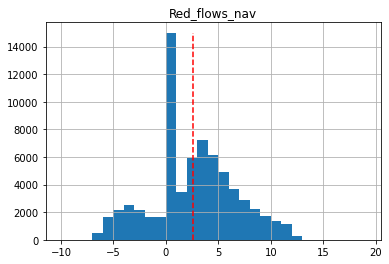

2.541304836385038


In [88]:
# Amount of investment 

df.hist(column='Red_flows_nav', bins = range(-10,20))
plt.vlines(x=np.nanmean(df["Red_flows_nav"]), ymin=0, ymax=15000, colors='red', linestyles='dashed')
plt.show()
print(np.nanmean(df["Red_flows_nav"]))

# In average, investment flows (quarterly) represent 2.54% of the fund's nav.
# There is a large variance: some funds have up to 10%.
# The distribution is very asymmetric and skewed towards inflows.

/var/folders/vt/cnvcr__n5pn60jkl8nh7fzrw0000gn/T/ipykernel_30355/3862808146.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4 = df3[(df["Sum_redemptions"] < df["Sum_redemptions"].quantile(q=0.9)) & (df["Sum_redemptions"] > df["Sum_redemptions"].quantile(q=0.1))]


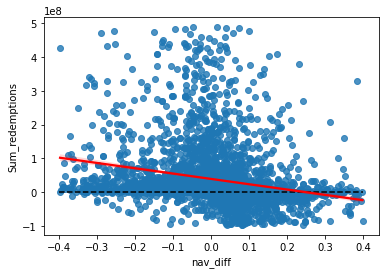

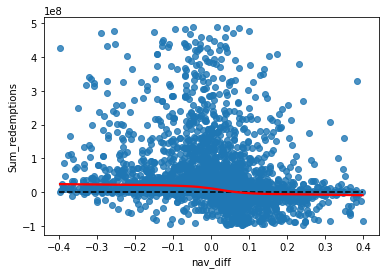

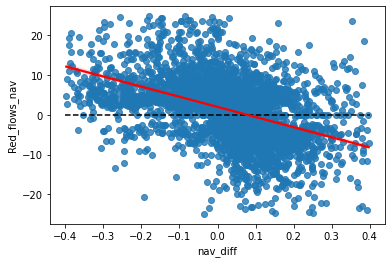

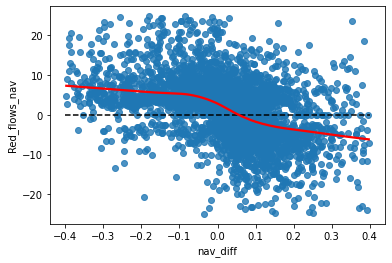

In [110]:
# Determinants of investment flows
# Are investment flows random? We hypothesise that they are not, and that investors are chasing performance in some way (momentum or contrarian).

df = pd.read_csv(path)
df["Sum_redemptions"] = df['month_1_flow_redemption'] + df['month_2_flow_redemption'] + df['month_3_flow_redemption']
df["Red_flows_nav"] = 100 * (df["Sum_redemptions"]) / df["net_assets"]
arr = [np.nan]
for i in range(len(df)):
    if i > 1:
        if df["series_id"].iloc[i] == df["series_id"].iloc[i-1]:
            arr.append((df["net_assets"].iloc[i] - df["Sum_redemptions"].iloc[i]) / df["net_assets"].iloc[i-1] - 1)
        else:
            arr.append(np.nan)
# print(arr)
arr.append(np.nan)
df["nav_diff"] = arr

import seaborn as sns
df = df[(df["nav_diff"] <= 1.0) &  (df["nav_diff"] >= -1.0)]
df = df[abs(df["Red_flows_nav"]) <= 25]

df2 = pd.DataFrame()
df2["nav_diff"] = df["nav_diff"]
df2["Sum_redemptions"] = df["Sum_redemptions"]
df2["Red_flows_nav"] = df["Red_flows_nav"]

df3 = df2[(df2["nav_diff"] <= 0.4) & (df2["nav_diff"] >= -0.4)]
df4 = df3[(df["Sum_redemptions"] < df["Sum_redemptions"].quantile(q=0.9)) & (df["Sum_redemptions"] > df["Sum_redemptions"].quantile(q=0.1))]


# df3.plot(x='nav_diff', y='Sum_redemptions', style='o',ms=2)
# plt.show()

# sns.regplot(x="nav_diff", y="Sum_redemptions", data=df3,line_kws={"color": "red"})
# plt.show()
# sns.regplot(x="nav_diff", y="Sum_redemptions", lowess=True,data=df3, line_kws={"color": "red"})
# plt.show()

sns.regplot(x="nav_diff", y="Sum_redemptions", data=df4, line_kws={"color": "red"})
plt.hlines(y=0, colors='black', linestyles='dashed',xmin = -0.4, xmax = 0.4)
plt.show()
sns.regplot(x="nav_diff", y="Sum_redemptions", lowess=True,data=df4, line_kws={"color": "red"})
plt.hlines(y=0, colors='black', linestyles='dashed',xmin = -0.4, xmax = 0.4)
plt.show()
sns.regplot(x="nav_diff", y="Red_flows_nav", data=df3, line_kws={"color": "red"})
plt.hlines(y=0, colors='black', linestyles='dashed',xmin = -0.4, xmax = 0.4)
plt.show()
sns.regplot(x="nav_diff", y="Red_flows_nav", lowess=True,data=df3, line_kws={"color": "red"})
plt.hlines(y=0, colors='black', linestyles='dashed',xmin = -0.4, xmax = 0.4)
plt.show()

In [ ]:
# This is reallt interesting.
# If we had a linear positive relation between returns and investment, we would have a totally different line.
# We would have something crossing from bottom left to top right.
# We actually have the inverse!
# 1) This relates to the litterature showing that mutual funds investors are mostly contrarian.

# 2) There is important variance around rhe regression lines. 